### Data Prep for Radar Plot (Position Profile)

In [158]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import datetime as DT

"""
data prep to plot position profiles for each position 
average all values

"""


#read file
df1 = pd.read_csv('players11.csv')
df2 = pd.read_csv('players12.csv')
#clean df3
df3 = pd.read_csv('players14.csv')



frames = [df1, df2]
df = pd.concat(frames,ignore_index=True)


#set filter: how strong would you like your players?
#df = df[(df['overall_rating']>90) & (df['sliding_tackle']>20)]

#change dob to age
now = pd.Timestamp(DT.datetime.now())
df['dob'] = pd.to_datetime(df['dob'], infer_datetime_format=True)    # 1
df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['dob']).astype('<m8[Y]')    # 3


#Group parameters
df['Tackling'] = df[['SlidingTackle','StandingTackle']].mean(axis=1)
df['Passing'] = df[['LongPassing','ShortPassing']].mean(axis=1)
df['Movement'] = df[['Acceleration','SprintSpeed','Agility']].mean(axis=1)
df = df[(df['club_pos']!='SUB')]

bar_df = df


#Position Profile
mapp = {'RM':'Midfield',
'GK': 'Goalkeeper',
'CB': 'Defense',
'LCB':'Defense',
'RCB': 'Defense',
'LB':'Defense',
'RB': 'Defense',
'RWB': 'Defense',
'LWB': 'Defense',
'CM' : 'Midfield',
'LDM': 'Midfield',
'LAM': 'Midfield',
'RDM': 'Midfield',
'RAM': 'Midfield',
'RCM' : 'Midfield',
'LCM' : 'Midfield',
'CDM': 'Midfield',
'CAM': 'Midfield',
'LM' : 'Midfield',
'RM' : 'Midfield',
'ST': 'Attack',
'CF': 'Attack',
'LW': 'Attack',
'RW': 'Attack',
'RS': 'Attack',
'LS' : 'Attack'}

#Attack: Ronaldo Vs Messi  (Finishing, SprintSpeed, Acceleration, Positioning, ShotPower, Dribbling)
#Midfield: Iniesta Vs Ribery/Pogba (BallControl,Interceptions,Stamina, SprintSpeed, Passing,Crossing)
#Defense: Diego Godin Vs Marcelo (Stamina,Interceptions,BallControl,Passing,Tackling,Marking)





#group positions by above mapping
grouped =  df.set_index('club_pos').groupby(mapp)
new_df = grouped
df = grouped.agg([np.mean])

#remove unnecessary titles
df.columns = df.columns.droplevel(1)

#Take wanted parameters
#set filter: what attributes would you like to see?
df = df[['Tackling','Interceptions','Passing','BallControl','Dribbling','Movement','Finishing']]
#IF not including goalkeepers
df.drop('Goalkeeper',inplace=True)
#cleanup
df.reset_index(level=0, inplace=True)
df.rename(index=int, columns={"index": "Position"},inplace=True)

df

,Position,Tackling,Interceptions,Passing,BallControl,Dribbling,Movement,Finishing
0,Attack,28.888337,31.955335,59.982630,71.771712,70.676179,73.657982,71.875931
1,Defense,70.759009,69.292230,62.356419,62.918356,56.322635,65.146396,38.471284
2,Midfield,53.585360,56.109157,69.597775,71.863942,70.065701,71.743749,59.595447


### Radar Plot (Position Profile)

This is the code showing how to get the radar plots of skills according to position on the field.

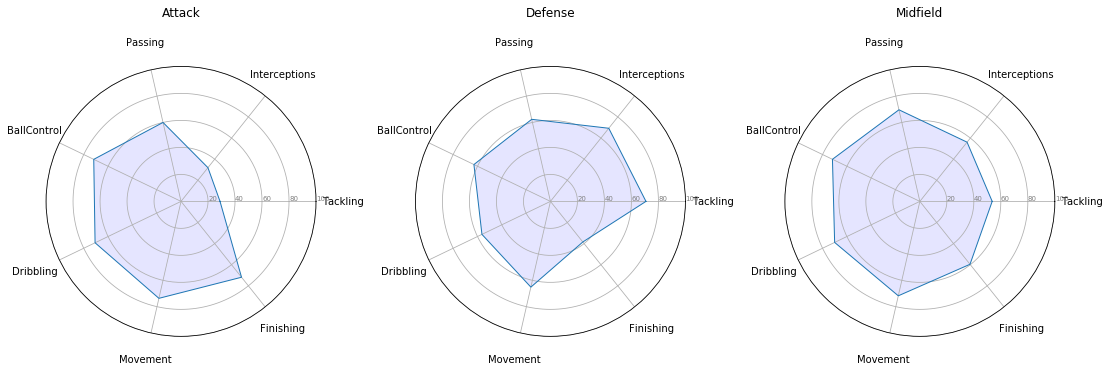

In [159]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi

"""
plot position profiles for each position 
average of all values


"""

 
#set data
size = len(df)    
fig = plt.figure(figsize=(20,20))
for i in xrange(0,size):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[i].drop('Position').values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    #angles = [math.degrees(float(angles[c])) for c in range(len(angles))]
    #angles = xrange(0,360,360/N)
    
    
    plots = 111 + 10*len(df)+i
    # Initialise the spider plot
    ax = fig.add_subplot(plots, polar=True)
    #ax.set_theta_offset(pi / 2)
    #ax.set_theta_direction(1)

    ax.set_title(df['Position'][i]+'\n'+'\n')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)
    ax.tick_params(axis='x', which='major', pad=17)
    # set ticklabels location at 1.3 times the axes' radius
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
plt.tight_layout() 
plt.show()

### Data Prep (VS)

In [160]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import datetime as DT

"""
position profiles of specific players


#Attack: Ronaldo Vs Messi  (Finishing, Movement, Positioning, ShotPower, Dribbling, HeadingAccuracy)
#Midfield: Iniesta Vs Ribery/Pogba (BallControl,Interceptions,Stamina, Movement, Passing, Crossing)
#Defense: Diego Godin Vs Marcelo (Stamina,Interceptions,BallControl,Passing,Tackling,Marking)
#GoalKeeper: Manuel Neuer vs De Gea (GKstuff)

"""



#read file
df = pd.read_csv('players11.csv')

#Group parameters
df['Tackling'] = df[['SlidingTackle','StandingTackle']].mean(axis=1)
df['Passing'] = df[['LongPassing','ShortPassing']].mean(axis=1)
df['Movement'] = df[['Acceleration','SprintSpeed','Agility']].mean(axis=1)


df_attack = df[(df['full_name'] == 'L. Messi') | (df['full_name'] == 'Cristiano Ronaldo')]
df_midfield = df[(df['full_name'] == 'Iniesta') | (df['full_name'] == 'F. Ribery')]
df_defense = df[(df['full_name'] == 'D. Godin') | (df['full_name'] == 'Jordi Alba')]
df_goalk = df[(df['full_name'] == 'De Gea') | (df['full_name'] == 'M. Neuer')]

df_attack.reset_index(level=0, inplace=True)
df_midfield.reset_index(level=0, inplace=True)
df_defense.reset_index(level=0, inplace=True)
df_goalk.reset_index(level=0, inplace=True)



#Take wanted parameters
#set filter: what attributes would you like to see?

df_attack = df_attack[['full_name','HeadingAccuracy','Dribbling','ShotPower','Positioning','Movement','Finishing']]
df_midfield = df_midfield[['full_name','Interceptions','Stamina','BallControl','Passing','Movement','Crossing']]
df_defense = df_defense[['full_name','Interceptions','Stamina','Marking','Passing','Movement','Tackling']]
df_goalk = df_goalk[['full_name','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]



### Radar Plot (VS) 

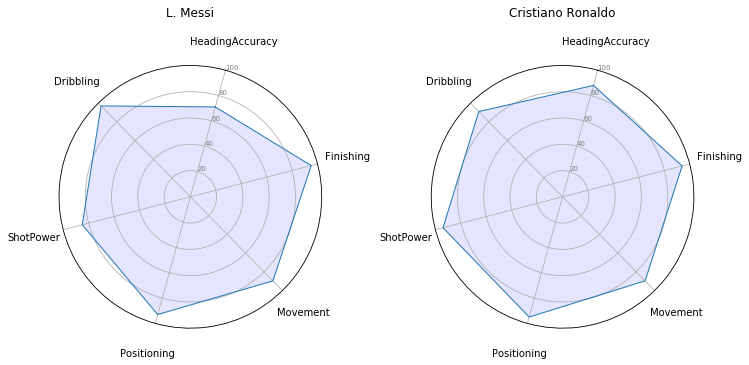

In [161]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi

"""
plot radar for specific players
to show different strategy of play
ATTACK
"""

df = df_attack
 
#set data
size = len(df)    
fig = plt.figure(figsize=(15,15))
for i in xrange(0,size):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[i].drop('full_name').values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    #angles = [math.degrees(float(angles[c])) for c in range(len(angles))]
    #angles = xrange(0,360,360/N)
    
    
    plots = 111 + 10*len(df)+i
    # Initialise the spider plot
    ax = fig.add_subplot(plots, polar=True)
    ax.set_theta_offset(1.3)
    #ax.set_theta_direction(1)

    ax.set_title(df['full_name'][i]+'\n'+'\n')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)
    ax.tick_params(axis='x', which='major', pad=20)
    # set ticklabels location at 1.3 times the axes' radius
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.tight_layout() 
plt.show()

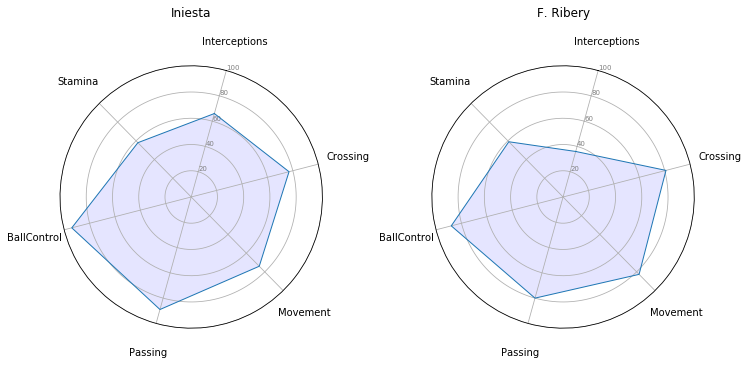

In [162]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi

"""
plot radar for specific players
to show different strategy of play
MIDFIELD
"""

df = df_midfield
 
#set data
size = len(df)    
fig = plt.figure(figsize=(15,15))
for i in xrange(0,size):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[i].drop('full_name').values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    #angles = [math.degrees(float(angles[c])) for c in range(len(angles))]
    #angles = xrange(0,360,360/N)
    
    
    plots = 111 + 10*len(df)+i
    # Initialise the spider plot
    ax = fig.add_subplot(plots, polar=True)
    ax.set_theta_offset(1.3)
    #ax.set_theta_direction(1)

    ax.set_title(df['full_name'][i]+'\n'+'\n')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)
    ax.tick_params(axis='x', which='major', pad=20)
    # set ticklabels location at 1.3 times the axes' radius
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.tight_layout() 
plt.show()

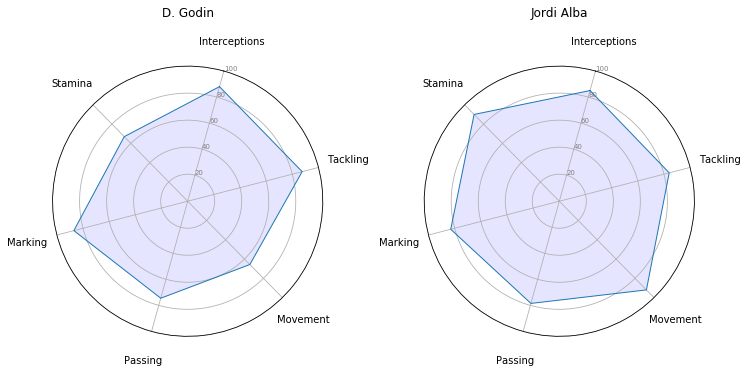

In [163]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi

"""
plot radar for specific players
to show different strategy of play
DEFENSE
"""

df = df_defense
 
#set data
size = len(df)    
fig = plt.figure(figsize=(15,15))
for i in xrange(0,size):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[i].drop('full_name').values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    #angles = [math.degrees(float(angles[c])) for c in range(len(angles))]
    #angles = xrange(0,360,360/N)
    
    
    plots = 111 + 10*len(df)+i
    # Initialise the spider plot
    ax = fig.add_subplot(plots, polar=True)
    ax.set_theta_offset(1.3)
    #ax.set_theta_direction(1)

    ax.set_title(df['full_name'][i]+'\n'+'\n')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)
    ax.tick_params(axis='x', which='major', pad=20)
    # set ticklabels location at 1.3 times the axes' radius
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.tight_layout() 
plt.show()

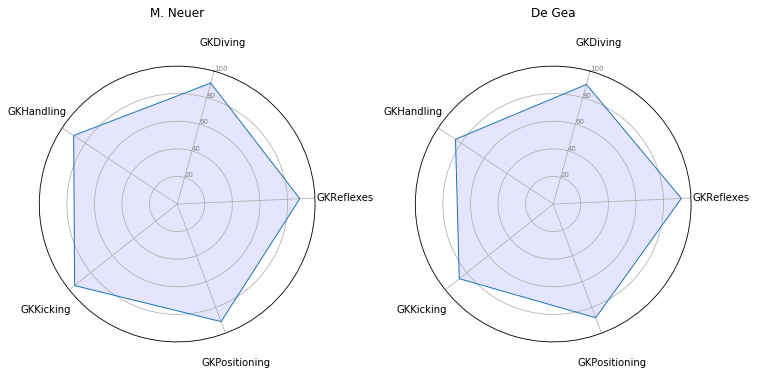

In [164]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi

"""
plot radar for specific players
to show different strategy of play
DEFENSE
"""

df = df_goalk
 
#set data
size = len(df)    
fig = plt.figure(figsize=(15,15))
for i in xrange(0,size):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[i].drop('full_name').values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    #angles = [math.degrees(float(angles[c])) for c in range(len(angles))]
    #angles = xrange(0,360,360/N)
    
    
    plots = 111 + 10*len(df)+i
    # Initialise the spider plot
    ax = fig.add_subplot(plots, polar=True)
    ax.set_theta_offset(1.3)
    #ax.set_theta_direction(1)

    ax.set_title(df['full_name'][i]+'\n'+'\n')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)
    ax.tick_params(axis='x', which='major', pad=20)
    # set ticklabels location at 1.3 times the axes' radius
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.tight_layout() 
plt.show()

### Line Chart

This shows how to plot correlations between wage, age and position in one graph, using the line plot. The stacks will be the positions, X the age, Y the wage. 

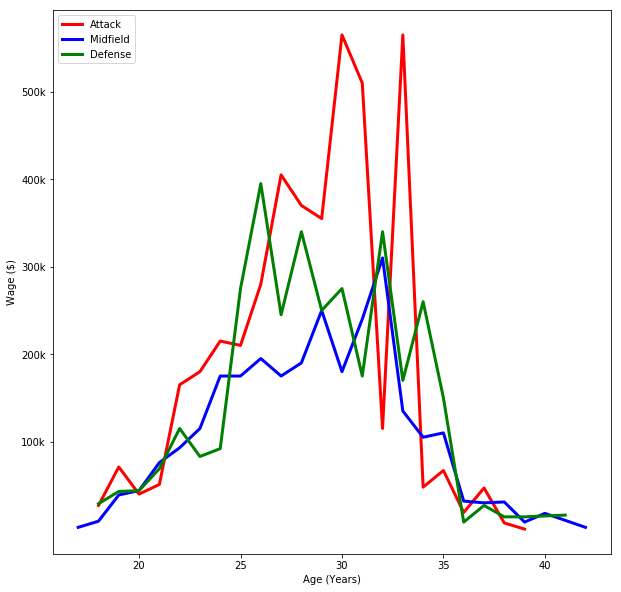

In [165]:
# library
import numpy as np
import matplotlib.pyplot as plt
"""
line chart for positions

Showing maximum paid per age per position


"""


 
fig=plt.figure(figsize=(10, 10))
y1 = new_df.get_group('Attack')
#y1.drop(y1[y1.full_name == 'L. Messi'].index, inplace=True)
#y1.drop(y1[y1.full_name == 'Cristiano Ronaldo'].index, inplace=True)
grouped =  y1.set_index('age').groupby('age')
y1 = grouped.agg([np.max])
y1 = y1[['wage']]

y2 = new_df.get_group('Defense')
grouped =  y2.set_index('age').groupby('age')
y2 = grouped.agg([np.max])
y2 = y2[['wage']]

y3 = new_df.get_group('Midfield')
grouped =  y3.set_index('age').groupby('age')
y3 = grouped.agg([np.max])
y3 = y3[['wage']]


plt.plot(y1.index, y1['wage'], 'r', y2.index, y2['wage'], 'b', y3.index, y3['wage'],'g',linewidth=3)
plt.legend(labels=['Attack','Midfield','Defense'], loc='upper left')
plt.xlabel('Age (Years)')
plt.ylabel('Wage ($)')
#with the best
plt.yticks(range(100000,600000,100000),['100k','200k','300k','400k','500k'])
#without
#plt.yticks(range(50000,350000,50000),['50k','100k','150k','200k','250k','300k'])

#plt.yticks(range(0,100000,10000),['0k','10k','20k','30k','40k','50k','60k','70k','80k','90k'])




plt.show()


# Basic stacked area chart.
#plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])



/Users/SanjaytheSellout/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/SanjaytheSellout/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


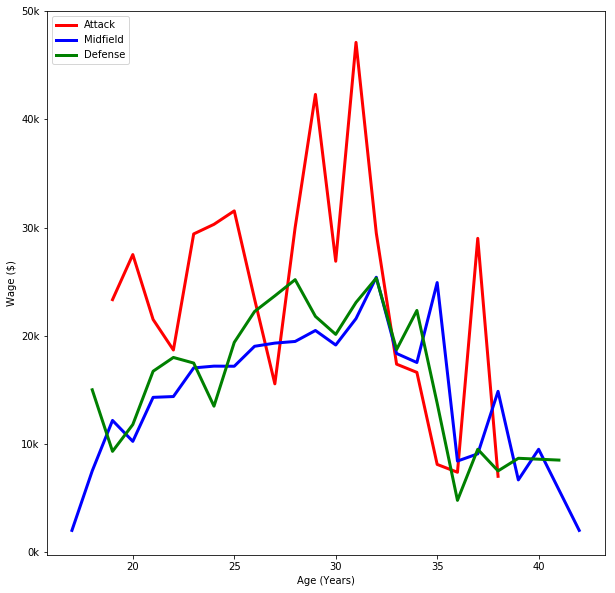

In [166]:
# library
import numpy as np
import matplotlib.pyplot as plt

"""
line chart for positions

Showing average paid per age per position


""" 
    
    
    
fig=plt.figure(figsize=(10, 10))
y1 = new_df.get_group('Attack')

#WITHOUT MESSI AND RONALDO
y1.drop(y1[y1.full_name == 'L. Messi'].index, inplace=True)
y1.drop(y1[y1.full_name == 'Cristiano Ronaldo'].index, inplace=True)

grouped =  y1.set_index('age').groupby('age')
y1 = grouped.agg([np.mean])
y1 = y1[['wage']]

y2 = new_df.get_group('Defense')
grouped =  y2.set_index('age').groupby('age')
y2 = grouped.agg([np.mean])
y2 = y2[['wage']]

y3 = new_df.get_group('Midfield')
grouped =  y3.set_index('age').groupby('age')
y3 = grouped.agg([np.mean])
y3 = y3[['wage']]


plt.plot(y1.index, y1['wage'], 'r', y2.index, y2['wage'], 'b', y3.index, y3['wage'],'g',linewidth=3)
plt.legend(labels=['Attack','Midfield','Defense'], loc='upper left')
plt.xlabel('Age (Years)')
plt.ylabel('Wage ($)')
#with the best
#plt.yticks(range(100000,600000,100000),['100k','200k','300k','400k','500k'])
#without
#plt.yticks(range(50000,350000,50000),['50k','100k','150k','200k','250k','300k'])
plt.yticks(range(0,60000,10000),['0k','10k','20k','30k','40k','50k','60k'])




plt.show()


# Basic stacked area chart.
#plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])



### Bar Plot

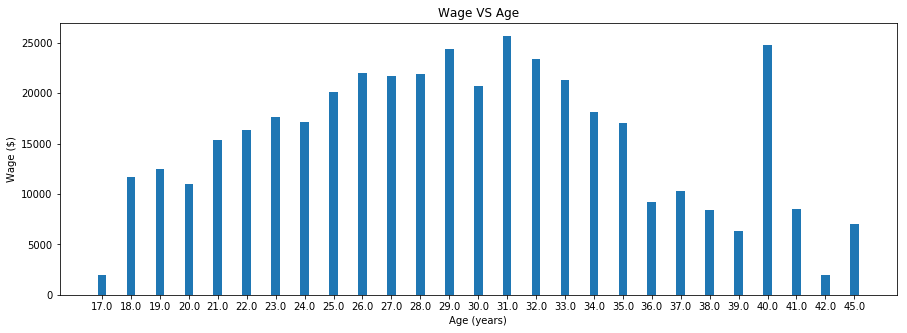

In [193]:
"""
bar plots showing average paid per age

"""


import matplotlib.pyplot as plt
import numpy as np
df = bar_df


#Drop Messi and Cristiano
#df.drop(df[df.full_name == 'L. Messi'].index, inplace=True)
#df.drop(df[df.full_name == 'Cristiano Ronaldo'].index, inplace=True)


df = df[['wage','age']]
#mean  = df.mean()
#std = df.std()
#df['wage'] = (df['wage'] - mean['wage'])/std['wage']
grouped = df.set_index('age').groupby('age')
df = grouped.agg([np.nanmean]).reset_index()
#print grouped.size()
age = df['age']
wage = df['wage']['nanmean']
y_pos = np.arange(len(age))
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.bar(y_pos,wage, 0.3, 0.3, align='center')
plt.xticks(y_pos, age)
plt.ylabel('Wage ($)')
plt.xlabel('Age (years)')
plt.title('Wage VS Age')
#plt.ylim(75,100)
plt.show()

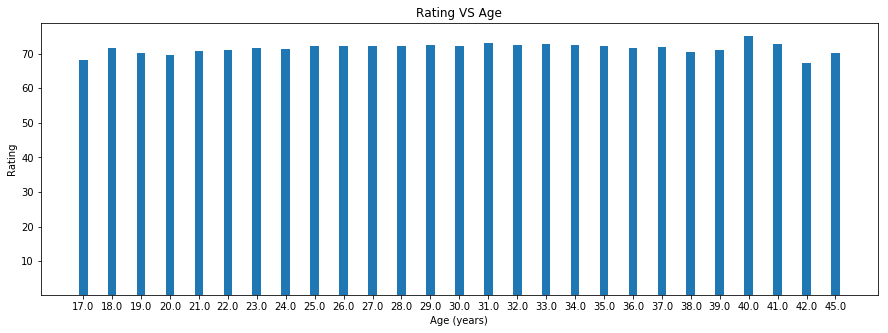

In [194]:
"""
bar plots showing average skill per age

"""


import matplotlib.pyplot as plt
import numpy as np
df = bar_df
#df.drop(df[df.full_name == 'L. Messi'].index, inplace=True)
#df.drop(df[df.full_name == 'Cristiano Ronaldo'].index, inplace=True)
df = df[['rating','age']]
#mean  = df.mean()
#std = df.std()
#df['wage'] = (df['wage'] - mean['wage'])/std['wage']
grouped = df.set_index('age').groupby('age')
df = grouped.agg([np.nanmean]).reset_index()

#print grouped.size()
age = df['age']
wage = df['rating']['nanmean']
y_pos = np.arange(len(age))
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.bar(y_pos,wage, 0.3, 0.3, align='center')
plt.xticks(y_pos, age)
plt.ylabel('Rating')
plt.xlabel('Age (years)')
plt.title('Rating VS Age')
#plt.ylim(75,100)
plt.show()

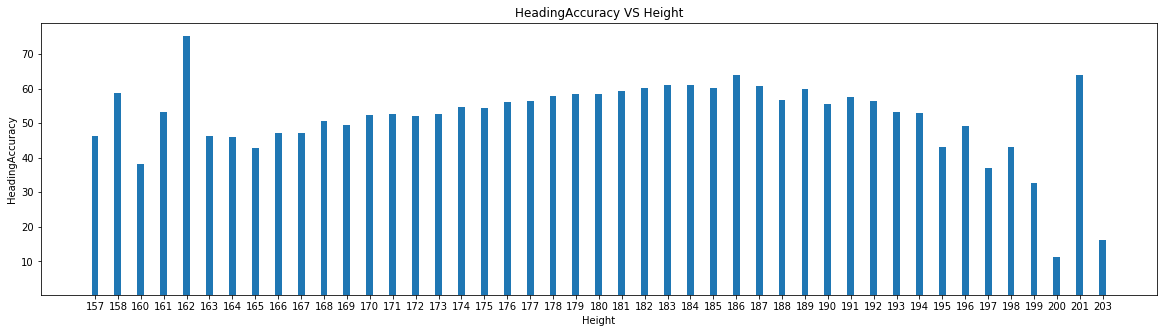

In [186]:
"""
bar plots showing average skill per age

"""


import matplotlib.pyplot as plt
import numpy as np
df = bar_df
#df.drop(df[df.full_name == 'L. Messi'].index, inplace=True)
#df.drop(df[df.full_name == 'Cristiano Ronaldo'].index, inplace=True)
df = df[['HeadingAccuracy','height']]
#mean  = df.mean()
#std = df.std()
#df['wage'] = (df['wage'] - mean['wage'])/std['wage']
grouped = df.set_index('height').groupby('height')
df = grouped.agg([np.nanmean]).reset_index()

#print grouped.size()
age = df['height']
wage = df['HeadingAccuracy']['nanmean']
y_pos = np.arange(len(age))
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.bar(y_pos,wage, 0.3, 0.3, align='center')
plt.xticks(y_pos, age)
plt.ylabel('HeadingAccuracy')
plt.xlabel('Height')
plt.title('HeadingAccuracy VS Height')
#plt.ylim(75,100)
plt.show()

### World Map Plot

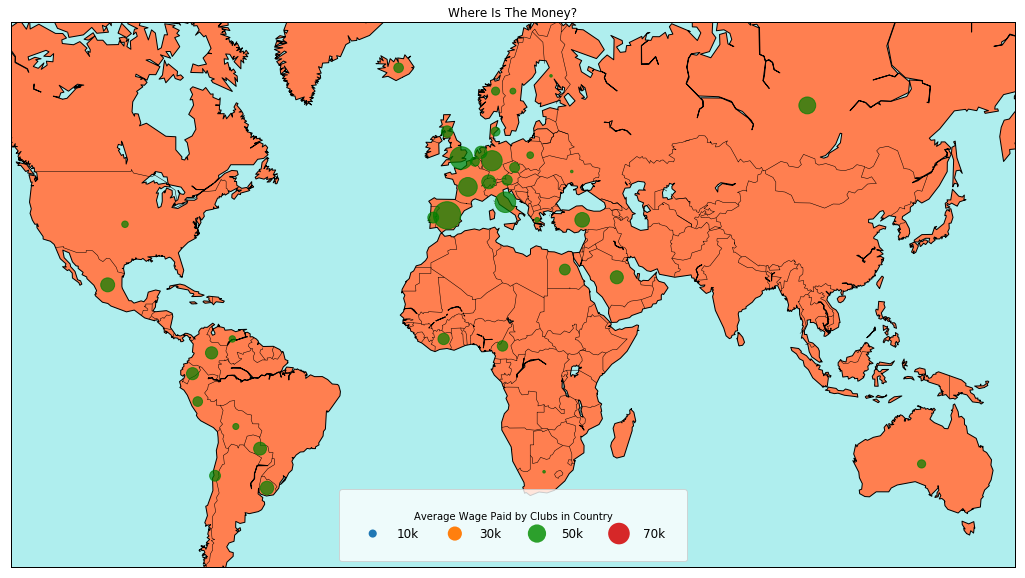

In [179]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import re

"""
World map plot for Clubs

"""


#data prep
#read file
df1 = pd.read_csv('players11.csv')
df2 = pd.read_csv('players12.csv')
df3 = pd.read_csv('players14.csv')
frames = [df1, df2, df3]
df = pd.concat(frames,ignore_index=True)
#need only country and wage
df = df[['country','wage']]
#clean up country column
df2 = pd.DataFrame(df['country'].str.split(',').values.tolist())
df = pd.concat([df['wage'], df2], axis=1)

#Make country club in first column, Country of origin second
df[1], df[0] = np.where(df[1].isnull(), [df[0], df[1]], [df[1], df[0] ])

#If doing country club, = 0. Origin = 1
df = df[['wage',0]]
df.drop(df[df[0].isnull()].index, inplace=True)
df[0] = df[0].apply(lambda x: re.sub("[^a-zA-Z ]+", "", x))
df.rename(index=int, columns={0: "country"},inplace=True)
#average country wage
grouped =  df.groupby('country')
df = grouped.agg([np.mean])


df = df.iloc[1:]

#convert country to coordinates
ccoor = pd.read_csv('CountryLatLong.csv')
ccoor[['Country','Latitude (average)','Longitude (average)']]
ccdict = ccoor.set_index('Country')[['Longitude (average)','Latitude (average)']].apply(tuple,axis=1).to_dict()

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.


## WORLD MAP MERC
"""
m = Basemap(projection='merc',llcrnrlat=-50,urcrnrlat=60,\
           llcrnrlon=-130,urcrnrlon=160,lat_ts=20,resolution='c')

m = Basemap(resolution='l',projection='merc',
             llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,
             lat_ts=(x1+x2)/2)

"""



fig=plt.figure(figsize=(18, 16))
#Let's create a basemap of Europe
x1 = -20.
x2 = 40.
y1 = 32.
y2 = 64.

m = Basemap(projection='merc',llcrnrlat=-50,urcrnrlat=70,\
           llcrnrlon=-130,urcrnrlon=160,lat_ts=20,resolution='c')
m.drawmapboundary(fill_color='paleturquoise')
m.fillcontinents(color='coral',lake_color='paleturquoise')
m.drawcoastlines()
m.drawcountries()
plt.title("Where Is The Money?")

lon = []
lat = []

## in progress
for i in xrange(0,len(df)):
    coords = ccdict[str(df.index[i])]
    lon.append(coords[0])
    lat.append(coords[1])
    
norm = 150  
m.scatter(lon, lat, latlon=True, s=df[['wage']]/norm, alpha=0.7,zorder=10,c='green')
l1 = plt.scatter([],[], s=10000/norm, edgecolors='none')
l2 = plt.scatter([],[], s=30000/norm, edgecolors='none')
l3 = plt.scatter([],[], s=50000/norm, edgecolors='none')
l4 = plt.scatter([],[], s=70000/norm, edgecolors='none')

labels = ["10k", "30k", "50k", "70k"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, title='Average Wage Paid by Clubs in Country', scatterpoints = 1)

plt.show()


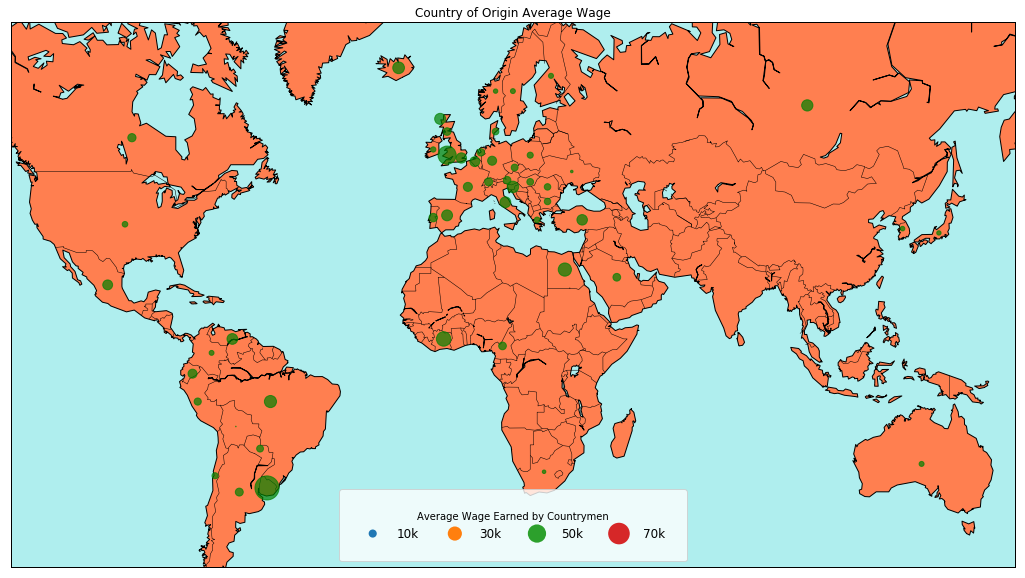

In [196]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import re

"""
World map plot for Country of Origin

"""


#data prep
#read file
df1 = pd.read_csv('players11.csv')
df2 = pd.read_csv('players12.csv')
df3 = pd.read_csv('players14.csv')
frames = [df1, df2, df3]
df = pd.concat(frames,ignore_index=True)
#need only country and wage
df = df[['country','wage']]
#clean up country column
df2 = pd.DataFrame(df['country'].str.split(', ').values.tolist())
df = pd.concat([df['wage'], df2], axis=1)

#Make country club in first column, Country of origin second
df[1], df[0] = np.where(df[1].isnull(), [df[0], df[1]], [df[1], df[0] ])

#If doing country club, = 0. Origin = 1
df = df[['wage',1]]
df.drop(df[df[1].isnull()].index, inplace=True)
df[1] = df[1].apply(lambda x: re.sub("[^a-zA-Z ]+", "", x))
df.rename(index=int, columns={1: "country"},inplace=True)
#average country wage
grouped =  df.groupby('country')
df = grouped.agg([np.mean])


df = df.iloc[1:]

#convert country to coordinates
ccoor = pd.read_csv('CountryLatLong.csv')
ccoor[['Country','Latitude (average)','Longitude (average)']]
ccdict = ccoor.set_index('Country')[['Longitude (average)','Latitude (average)']].apply(tuple,axis=1).to_dict()

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.


## WORLD MAP MERC
"""
m = Basemap(projection='merc',llcrnrlat=-50,urcrnrlat=60,\
           llcrnrlon=-130,urcrnrlon=160,lat_ts=20,resolution='c')

m = Basemap(resolution='l',projection='merc',
             llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,
             lat_ts=(x1+x2)/2)

"""



fig=plt.figure(figsize=(18, 16))
#Let's create a basemap of Europe
x1 = -20.
x2 = 40.
y1 = 32.
y2 = 64.

m = Basemap(projection='merc',llcrnrlat=-50,urcrnrlat=70,\
           llcrnrlon=-130,urcrnrlon=160,lat_ts=20,resolution='c')
m.drawmapboundary(fill_color='paleturquoise')
m.fillcontinents(color='coral',lake_color='paleturquoise')
m.drawcoastlines()
m.drawcountries()
plt.title("Country of Origin Average Wage")

lon = []
lat = []

## in progress
for i in xrange(0,len(df)):
    coords = ccdict[str(df.index[i])]
    lon.append(coords[0])
    lat.append(coords[1])
    
norm = 150  
m.scatter(lon, lat, latlon=True, s=df[['wage']]/norm, alpha=0.7,zorder=10,c='green')
l1 = plt.scatter([],[], s=10000/norm, edgecolors='none')
l2 = plt.scatter([],[], s=30000/norm, edgecolors='none')
l3 = plt.scatter([],[], s=50000/norm, edgecolors='none')
l4 = plt.scatter([],[], s=70000/norm, edgecolors='none')

labels = ["10k", "30k", "50k", "70k"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, title='Average Wage Earned by Countrymen', scatterpoints = 1)

plt.show()
